In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
weather = pd.read_csv('testset.csv')

In [3]:
weather.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [6]:
weather.rename(columns={'datetime_utc': 'datetime(utc)', ' _conds': 'conditions', ' _dewptm': 'dewtemp', ' _fog': 'fog',
                        ' _hail': 'hail', ' _heatindexm': 'heatindex', ' _hum': 'humidity', ' _precipm': 'precipitation',
                        ' _pressurem': 'pressure', ' _rain': 'rain', ' _snow': 'snow', ' _tempm': 'temperature',
                        ' _thunder': 'thunder', ' _tornado': 'tornado', ' _vism': 'vism', ' _wdird': 'wdird',
                        ' _wdire': 'wdirection', ' _wgustm': 'wgustm', ' _windchillm': 'windchill', ' _wspdm': 'wspdm'}, inplace=True)

In [7]:
weather.describe()

,dewtemp,fog,hail,heatindex,humidity,precipitation,pressure,rain,snow,temperature,thunder,tornado,vism,wdird,wgustm,windchill,wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [8]:
weather['fog'].value_counts()

0    93952
1     7038
Name: fog, dtype: int64

In [9]:
weather['hail'].value_counts()

0    100977
1        13
Name: hail, dtype: int64

In [12]:
weather.head()

,datetime(utc),conditions,dewtemp,fog,hail,heatindex,humidity,precipitation,pressure,rain,snow,temperature,thunder,tornado,vism,wdird,wdirection,wgustm,windchill,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [16]:
 #Since all the values are null we can remove this column.
weather['precipitation'].isnull().value_counts()

True    100990
Name: precipitation, dtype: int64

In [17]:
weather = weather.drop('precipitation', axis=1)

In [28]:
weather

,datetime(utc),conditions,dewtemp,fog,hail,heatindex,humidity,pressure,rain,snow,temperature,thunder,tornado,vism,wdird,wdirection,wgustm,windchill,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,19961101-17:00,Smoke,12.0,0,0,NaN,56.0,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,19961101-19:00,Smoke,13.0,0,0,NaN,60.0,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,19961101-20:00,Smoke,13.0,0,0,NaN,68.0,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,19961101-21:00,Smoke,13.0,0,0,NaN,68.0,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [29]:
#Since this data can be filled with average mean value of the column we will fill in the data.
weather['humidity'].isnull().value_counts()

False    100233
True        757
Name: humidity, dtype: int64

In [30]:
weather = weather.fillna(value=weather['humidity'].mean())

In [31]:
#Now humidity has no null values and hence is cleaned.
weather['humidity'].isnull().value_counts()

False    100990
Name: humidity, dtype: int64

In [32]:
#Hence now we are left with the cleaned data with no null values.
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 19 columns):
datetime(utc)    100990 non-null object
conditions       100990 non-null object
dewtemp          100990 non-null float64
fog              100990 non-null int64
hail             100990 non-null int64
heatindex        100990 non-null float64
humidity         100990 non-null float64
pressure         100990 non-null float64
rain             100990 non-null int64
snow             100990 non-null int64
temperature      100990 non-null float64
thunder          100990 non-null int64
tornado          100990 non-null int64
vism             100990 non-null float64
wdird            100990 non-null float64
wdirection       100990 non-null object
wgustm           100990 non-null float64
windchill        100990 non-null float64
wspdm            100990 non-null float64
dtypes: float64(10), int64(6), object(3)
memory usage: 13.5+ MB


In [33]:
d_month = dict()

for i in range(len(weather)):
    if (not pd.isna(weather['dewtemp'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month:    
            d_month[month].append(weather['dewtemp'][i])
        else:
            d_month[month] = [weather['dewtemp'][i]]
print(d_month)

{'11': [9.0, 10.0, 11.0, 10.0, 11.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 11.0, 11.0, 10.0, 10.0, 10.0, 11.0, 10.0, 10.0, 8.0, 7.0, 7.0, 8.0, 10.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 12.0, 12.0, 11.0, 11.0, 10.0, 12.0, 12.0, 14.0, 13.0, 9.0, 11.0, 11.0, 11.0, 12.0, 12.0, 14.0, 13.0, 13.0, 12.0, 13.0, 12.0, 12.0, 13.0, 12.0, 13.0, 13.0, 12.0, 11.0, 11.0, 12.0, 12.0, 12.0, 10.0, 8.0, 9.0, 7.0, 10.0, 10.0, 10.0, 9.0, 9.0, 10.0, 11.0, 11.0, 9.0, 9.0, 8.0, 7.0, 8.0, 9.0, 7.0, 8.0, 5.0, 7.0, 7.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 12.0, 13.0, 13.0, 11.0, 11.0, 8.0, 8.0, 7.0, 7.0, 9.0, 9.0, 10.0, 9.0, 9.0, 9.0, 8.0, 8.0, 9.0, 9.0, 8.0, 8.0, 7.0, 57.90948090948091, 8.0, 7.0, 9.0, 9.0, 9.0, 5.0, 6.0, 6.0, 6.0, 6.0, 9.0, 9.0, 10.0, 9.0, 9.0, 10.0, 9.0, 10.0, 9.0, 9.0, 8.0, 8.0, 7.0, 7.0, 6.0, 7.0, 9.0, 9.0, 7.0, 8.0, 7.0, 8.0, 7.0, 8.0, 8.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 7.0, 6.0, 5.0, 

In [34]:
meanDew = {}
for month, dew in d_month.items():
  dewmean = 0
  for i in range(len(dew)):
    dewmean += dew[i]
  dewmean = dewmean / len(dew)
  meanDew[int(month)] = dewmean
print(meanDew)

{11: 11.21188108496593, 12: 9.263492920914889, 1: 9.20790708213919, 2: 10.261310059091853, 3: 12.286711695632238, 4: 12.498167243593482, 5: 15.697796814288962, 6: 21.484793814703952, 7: 24.75077196862371, 8: 24.85903488669293, 9: 23.09293612167175, 10: 17.27797387808949}


In [35]:
l = sorted(meanDew.items())
x_dewtemp, y_dewtemp = zip(*l)
print(x_dewtemp)
print(y_dewtemp)

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(9.20790708213919, 10.261310059091853, 12.286711695632238, 12.498167243593482, 15.697796814288962, 21.484793814703952, 24.75077196862371, 24.85903488669293, 23.09293612167175, 17.27797387808949, 11.21188108496593, 9.263492920914889)


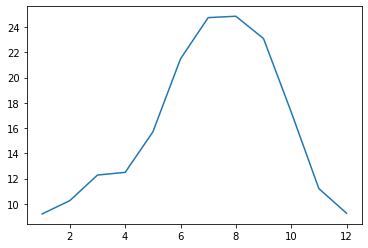

In [36]:
plt.plot(x_dewtemp, y_dewtemp)

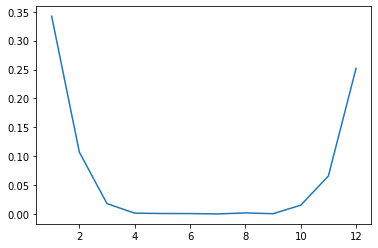

In [37]:
#for fog:
d_month = dict()

for i in range(len(weather)):
    if(not pd.isna(weather['fog'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['fog'][i])
        else:
            d_month[month] = [weather['fog'][i]]

meanFog = {}
for month, fog in d_month.items():
    fogmean = 0
    for i in range(len(fog)):
        fogmean += fog[i]
    fogmean = fogmean/len(fog)
    meanFog[int(month)] = fogmean
    
l = sorted(meanFog.items())
x_fog, y_fog = zip(*l)
plt.plot(x_fog,y_fog)

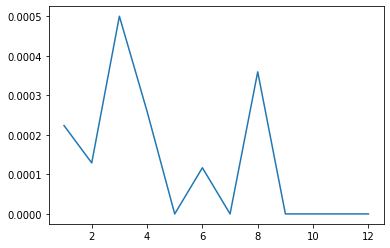

In [38]:
#for hail:
d_month = dict()

for i in range(len(weather)):
    if(not pd.isna(weather['hail'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['hail'][i])
        else:
            d_month[month] = [weather['hail'][i]]

meanHail = {}
for month, hail in d_month.items():
    hailmean = 0
    for i in range(len(hail)):
        hailmean += hail[i]
    hailmean = hailmean/len(hail)
    meanHail[int(month)] = hailmean
    
l = sorted(meanHail.items())
x_hail, y_hail = zip(*l)
plt.plot(x_hail,y_hail)

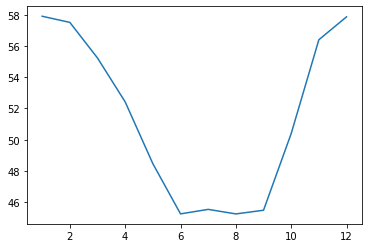

In [39]:
#for heatindex:
d_month = dict()

for i in range(len(weather)):
    if (not pd.isna(weather['heatindex'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['heatindex'][i])
        else:
            d_month[month] = [weather['heatindex'][i]]

meanHeatindex = {}
for month, heat in d_month.items():
    heatmean = 0
    for i in range(len(heat)):
        heatmean += heat[i]
    heatmean = heatmean/len(heat)
    meanHeatindex[int(month)] = heatmean
    
l = sorted(meanHeatindex.items())
x_heat, y_heat = zip(*l)
plt.plot(x_heat,y_heat)

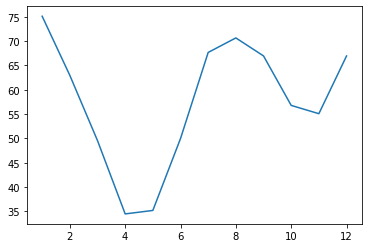

In [40]:
#for humidity:
d_month = dict()

for i in range(len(weather)):
    if (not pd.isna(weather['humidity'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['humidity'][i])
        else:
            d_month[month] = [weather['humidity'][i]]

meanHumidity = {}
for month, humidity in d_month.items():
    humidmean = 0
    for i in range(len(humidity)):
        humidmean += humidity[i]
    humidmean = humidmean/len(humidity)
    meanHumidity[int(month)] = humidmean
    
l = sorted(meanHumidity.items())
x_humid, y_humid = zip(*l)
plt.plot(x_humid,y_humid)

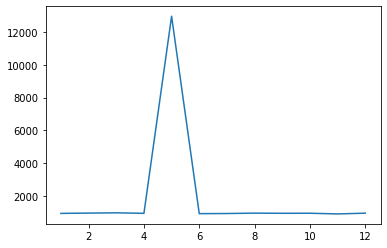

In [41]:
#for pressure:
d_month = dict()

for i in range(len(weather)):
    if (not pd.isna(weather['pressure'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['pressure'][i])
        else:
            d_month[month] = [weather['pressure'][i]]

meanPressure = {}
for month, press in d_month.items():
    pressmean = 0
    for i in range(len(press)):
        pressmean += press[i]
    pressmean = pressmean/len(press)
    meanPressure[int(month)] = pressmean
    
l = sorted(meanPressure.items())
x_press, y_press = zip(*l)
plt.plot(x_press,y_press)

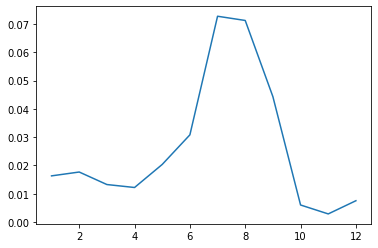

In [42]:
#for rain:
d_month = dict()

for i in range(len(weather)):
    if (not pd.isna(weather['rain'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['rain'][i])
        else:
            d_month[month] = [weather['rain'][i]]

meanRain = {}
for month, rain in d_month.items():
    rainmean = 0
    for i in range(len(rain)):
        rainmean += rain[i]
    rainmean = rainmean/len(rain)
    meanRain[int(month)] = rainmean
    
l = sorted(meanRain.items())
x_rain, y_rain = zip(*l)
plt.plot(x_rain,y_rain)

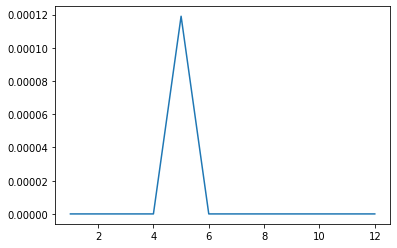

In [43]:
#for snow:
d_month = dict()

for i in range(len(weather)):
    if (not pd.isna(weather['snow'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['snow'][i])
        else:
            d_month[month] = [weather['snow'][i]]

meanSnow = {}
for month, snow in d_month.items():
    snowmean = 0
    for i in range(len(snow)):
        snowmean += snow[i]
    snowmean = snowmean/len(snow)
    meanSnow[int(month)] = snowmean
    
l = sorted(meanSnow.items())
x_snow, y_snow = zip(*l)
plt.plot(x_snow,y_snow)

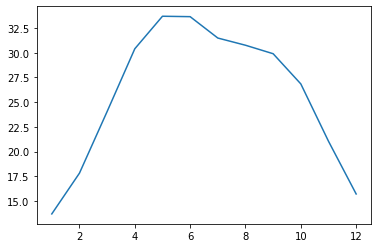

In [44]:
#for temperature:
d_month = dict()

for i in range(len(weather)):
    if (not pd.isna(weather['temperature'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['temperature'][i])
        else:
            d_month[month] = [weather['temperature'][i]]

meanTemperature = {}
for month, temp in d_month.items():
    tempmean = 0
    for i in range(len(temp)):
        tempmean += temp[i]
    tempmean = tempmean/len(temp)
    meanTemperature[int(month)] = tempmean
    
l = sorted(meanTemperature.items())
x_temp, y_temp = zip(*l)
plt.plot(x_temp,y_temp)

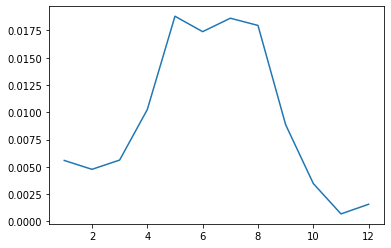

In [45]:
#for thunder:
d_month = dict()

for i in range(len(weather)):
    if (not pd.isna(weather['thunder'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['thunder'][i])
        else:
            d_month[month] = [weather['thunder'][i]]

meanThunder = {}
for month, thun in d_month.items():
    thunmean = 0
    for i in range(len(thun)):
        thunmean += thun[i]
    thunmean = thunmean/len(thun)
    meanThunder[int(month)] = thunmean
    
l = sorted(meanThunder.items())
x_thun, y_thun = zip(*l)
plt.plot(x_thun,y_thun)

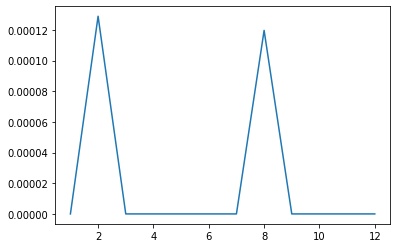

In [46]:
#for tornado:
d_month = dict()

for i in range(len(weather)):
    if (not pd.isna(weather['tornado'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['tornado'][i])
        else:
            d_month[month] = [weather['tornado'][i]]

meanTornado = {}
for month, torn in d_month.items():
    tornmean = 0
    for i in range(len(torn)):
        tornmean += torn[i]
    tornmean = tornmean/len(torn)
    meanTornado[int(month)] = tornmean
    
l = sorted(meanTornado.items())
x_torn, y_torn = zip(*l)
plt.plot(x_torn,y_torn)

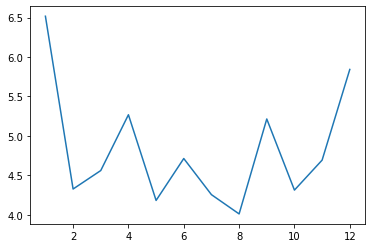

In [47]:
#for visibility:
d_month = dict()

for i in range(len(weather)):
    if (not pd.isna(weather['vism'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['vism'][i])
        else:
            d_month[month] = [weather['vism'][i]]

meanVism = {}
for month, vism in d_month.items():
    vismmean = 0
    for i in range(len(vism)):
        vismmean += vism[i]
    vismmean = vismmean/len(vism)
    meanVism[int(month)] = vismmean
    
l = sorted(meanVism.items())
x_vism, y_vism = zip(*l)
plt.plot(x_vism,y_vism)

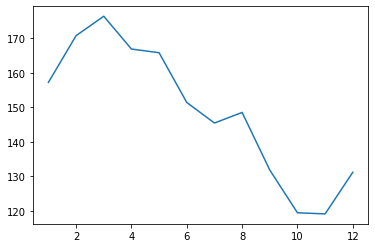

In [48]:
#for wdird:
d_month = dict()

for i in range(len(weather)):
    if (not pd.isna(weather['wdird'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['wdird'][i])
        else:
            d_month[month] = [weather['wdird'][i]]

meanWdird = {}
for month, wdir in d_month.items():
    wdirmean = 0
    for i in range(len(wdir)):
        wdirmean += wdir[i]
    wdirmean = wdirmean/len(wdir)
    meanWdird[int(month)] = wdirmean
    
l = sorted(meanWdird.items())
x_wdir, y_wdir = zip(*l)
plt.plot(x_wdir,y_wdir)

ValueError: setting an array element with a sequence.

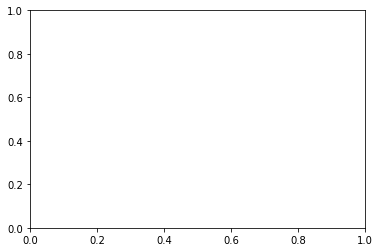

In [49]:
#for wgustm:
d_month = dict()

for i in range(len(weather)):
    if(not pd.isna(weather['wgustm'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month:    
            d_month[month].append(weather['wgustm'][i])
        else:
            d_month[month] = [weather['wgustm'][i]]

meanWgustm = {}
for month, wgus in d_month.items():
    wgusmean = 0
    for i in range(len(wgus)):
        wgusmean += wgus[i]
    wgusmean = wgusmean/len(wgus)
    meanWgustm[int(month)] = wgus
    
l = sorted(meanWgustm.items())
x_wgus, y_wgus = zip(*l)
plt.plot(x_wgus, y_wgus)

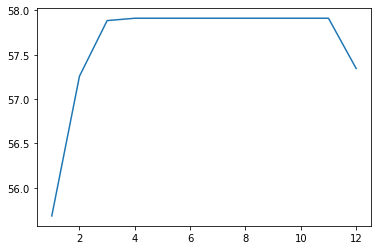

In [50]:
#for windchill:
d_month = dict()

for i in range(len(weather)):
    if(not pd.isna(weather['windchill'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month.keys():    
            d_month[month].append(weather['windchill'][i])
        else:
            d_month[month] = [weather['windchill'][i]]

meanWindchill = {}
for month, wind in d_month.items():
    windmean = 0
    for i in range(len(wind)):
        windmean += wind[i]
    windmean = windmean/len(wind)
    meanWindchill[int(month)] = windmean
    
l = sorted(meanWindchill.items())
x_wind, y_wind = zip(*l)
plt.plot(x_wind,y_wind)

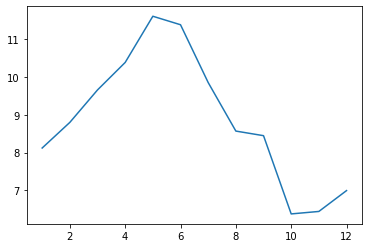

In [51]:
#for wspdm:
d_month = dict()

for i in range(len(weather)):
    if(not pd.isna(weather['wspdm'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in d_month:    
            d_month[month].append(weather['wspdm'][i])
        else:
            d_month[month] = [weather['wspdm'][i]]

meanWspdm = {}
for month, wspd in d_month.items():
    wspdmean = 0
    for i in range(len(wspd)):
        wspdmean += wspd[i]
    wspdmean = wspdmean/len(wspd)
    meanWspdm[int(month)] = wspdmean
    
l = sorted(meanWspdm.items())
x_wspd, y_wspd = zip(*l)
plt.plot(x_wspd,y_wspd)

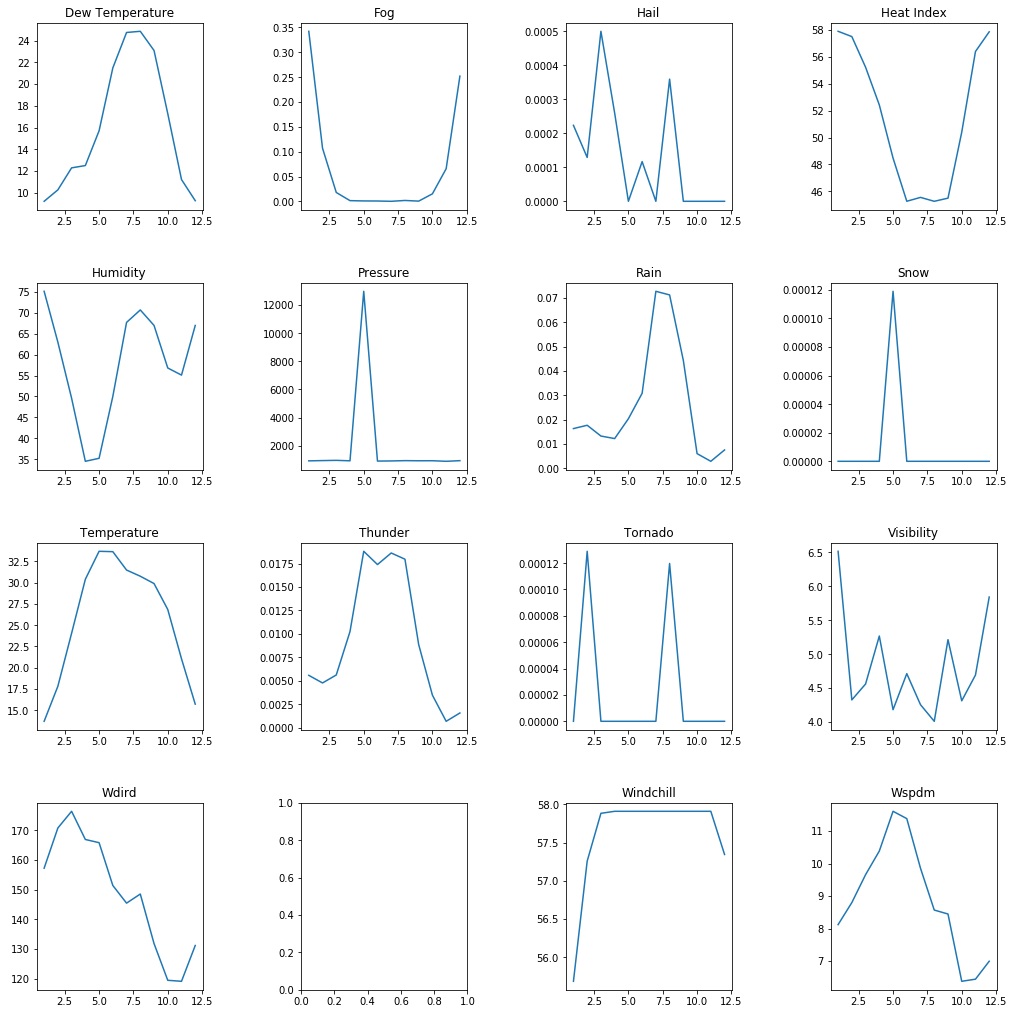

In [53]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))

axes[0,0].plot(x_dewtemp,y_dewtemp)
axes[0,0].set_title('Dew Temperature')

axes[0,1].plot(x_fog,y_fog)
axes[0,1].set_title('Fog')

axes[0,2].plot(x_hail,y_hail)
axes[0,2].set_title('Hail')

axes[0,3].plot(x_heat,y_heat)
axes[0,3].set_title('Heat Index')

axes[1,0].plot(x_humid,y_humid)
axes[1,0].set_title('Humidity')

axes[1,1].plot(x_press,y_press)
axes[1,1].set_title('Pressure')

axes[1,2].plot(x_rain,y_rain)
axes[1,2].set_title('Rain')

axes[1,3].plot(x_snow,y_snow)
axes[1,3].set_title('Snow')

axes[2,0].plot(x_temp,y_temp)
axes[2,0].set_title('Temperature')

axes[2,1].plot(x_thun,y_thun)
axes[2,1].set_title('Thunder')

axes[2,2].plot(x_torn,y_torn)
axes[2,2].set_title('Tornado')

axes[2,3].plot(x_vism,y_vism)
axes[2,3].set_title('Visibility')

axes[3,0].plot(x_wdir,y_wdir)
axes[3,0].set_title('Wdird')

# axes[3,1].plot(x_wgus,y_wgus)
# axes[3,1].set_title('Wgusm')

axes[3,2].plot(x_wind,y_wind)
axes[3,2].set_title('Windchill')

axes[3,3].plot(x_wspd,y_wspd)
axes[3,3].set_title('Wspdm')
plt.tight_layout(pad=4)

# print()
# print(list(x_wspd))
# axes[0].plot(x_wspd.tolist(), y_wspd.tolist())

In [54]:
weather['conditions'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
57.90948090948091                   72
Light Fog                           64
Light Thunderstorm       

In [55]:
# con_dict=dict()
# for i in range(len(weather)):
#     if(not pd.isna(weather['conditions'][i])):
#         month = str(weather['datetime(utc)'][i].split()[0][4:6])
#         if month in con_dict:
#             con_dict[month].append(weather['conditions'][i])
#         else:
#             con_dict[month] = [weather['conditions'][i]]
# print(con_dict)


# con_dict = dict()
# in_dict = dict()

# for i in range(len(weather)):
#     if(not pd.isna(weather['conditions'][i])):
#         month = str(weather['datetime(utc)'][i].split()[0][4:6])
#         if month in con_dict:
#             p=0
#             if weather['conditions'][i] in in_dict:
#                 in_dict[weather['conditions'][i]] += 1
#             else:
#                 in_dict[weather['conditions'][i]] = p+1
#             con_dict[month].append(weather['conditions'][i])
#         else:
#             con_dict[month] = [weather['conditions'][i]]
# print(con_dict)
# print(in_dict)

con_dict = dict()

for i in range(len(weather)):
    if(not pd.isna(weather['conditions'][i])):
        month = str(weather['datetime(utc)'][i].split()[0][4:6])
        if month in con_dict:
            if weather['conditions'][i] in con_dict[month]:
                con_dict[month][weather['conditions'][i]] += 1
            else:
                con_dict[month].update([(weather['conditions'][i],1)])
        else:
#             print('************')
            con_dict[month] = dict()
            con_dict[month].update([(weather['conditions'][i],1)])

l = sorted(con_dict.items())
x,y = zip(*l)
print(x)
print(y)


('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12')
({'Fog': 1434, 'Unknown': 28, 'Shallow Fog': 711, 'Smoke': 2439, 'Clear': 317, 'Scattered Clouds': 155, 'Patches of Fog': 302, 'Haze': 1212, 'Thunderstorms and Rain': 26, 'Overcast': 81, 'Rain': 25, 'Mostly Cloudy': 208, 'Partly Cloudy': 183, 'Light Rain': 57, 'Thunderstorm': 3, 'Mist': 1070, 'Light Drizzle': 29, 'Light Thunderstorms and Rain': 18, 'Drizzle': 8, 'Volcanic Ash': 1, 'Heavy Thunderstorms and Rain': 2, 'Heavy Rain': 5, 'Partial Fog': 325, 'Heavy Fog': 269, 57.90948090948091: 5, 'Light Fog': 22, 'Widespread Dust': 10, 'Blowing Sand': 6, 'Light Hail Showers': 1, 'Thunderstorms with Hail': 1}, {'Fog': 279, 'Smoke': 1907, 'Clear': 438, 'Shallow Fog': 310, 'Light Rain': 64, 'Light Drizzle': 31, 'Drizzle': 5, 'Mostly Cloudy': 75, 'Scattered Clouds': 94, 'Haze': 2850, 'Mist': 1106, 'Unknown': 21, 'Partly Cloudy': 168, 'Rain': 24, 'Overcast': 17, 'Heavy Thunderstorms with Hail': 1, 'Thunderstorms and Rain': 2

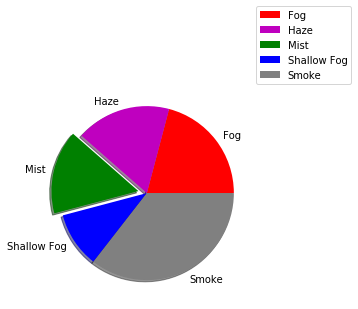

In [56]:
activities1 = ['Fog', 'Haze','Mist', 'Shallow Fog', 'Smoke']
slices1 = [con_dict['01']['Fog'],con_dict['01']['Haze'],con_dict['01']['Mist'],con_dict['01']['Shallow Fog'],con_dict['01']['Smoke']]
colors1 = ['r','m','g','b','grey']
plt.pie(slices1, labels=activities1, colors=colors1, shadow=True, explode=(0,0,0.1,0,0))
plt.legend(loc=(1,1))
plt.show()

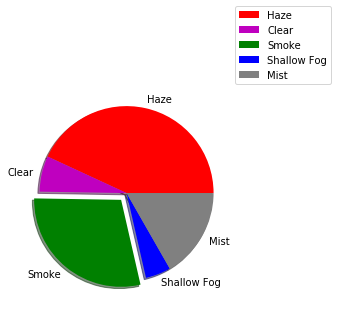

In [57]:
activities2 = ['Haze', 'Clear','Smoke', 'Shallow Fog', 'Mist']
slices2 = [con_dict['02']['Haze'],con_dict['02']['Clear'],con_dict['02']['Smoke'],con_dict['02']['Shallow Fog'],con_dict['02']['Mist']]
colors2 = ['r','m','g','b','grey']
plt.pie(slices2, labels=activities2, colors=colors2, shadow=True, explode=(0,0,0.1,0,0))
plt.legend(loc=(1,1))
plt.show()

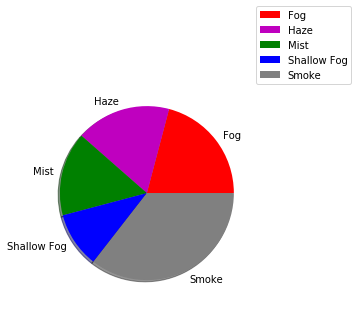

In [58]:
activities3 = ['Haze', 'Smoke','Mist']
slices3 = [con_dict['03']['Haze'],con_dict['03']['Smoke'],con_dict['03']['Mist']]
colors3 = ['r','m','g']
plt.pie(slices1, labels=activities1, colors=colors1, shadow=True)
plt.legend(loc=(1,1))
plt.show()

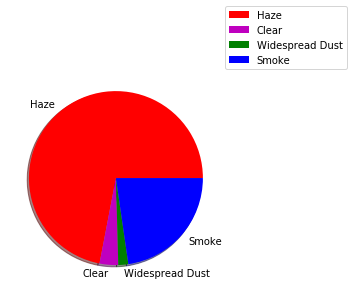

In [59]:
activities4 = ['Haze', 'Clear','Widespread Dust', 'Smoke']
slices4 = [con_dict['03']['Haze'],con_dict['03']['Clear'],con_dict['03']['Widespread Dust'],con_dict['03']['Smoke']]
colors4 = ['r','m','g','b']
plt.pie(slices4, labels=activities4, colors=colors4, shadow=True)
plt.legend(loc=(1,1))
plt.show()

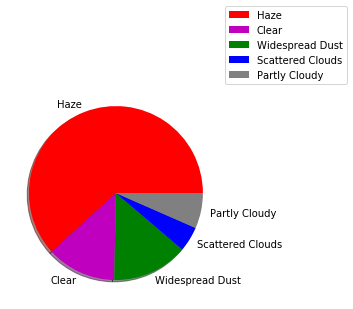

In [60]:
activities5 = ['Haze', 'Clear','Widespread Dust', 'Scattered Clouds', 'Partly Cloudy']
slices5 = [con_dict['05']['Haze'],con_dict['05']['Clear'],con_dict['05']['Widespread Dust'],con_dict['05']['Scattered Clouds'],con_dict['05']['Partly Cloudy']]
colors5 = ['r','m','g','b','grey']
plt.pie(slices5, labels=activities5, colors=colors5, shadow=True)
plt.legend(loc=(1,1))
plt.show()

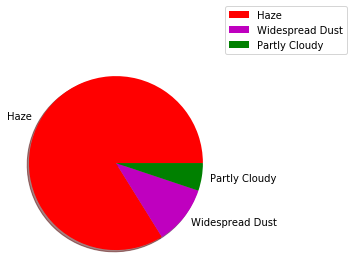

In [61]:
activities6 = ['Haze','Widespread Dust', 'Partly Cloudy']
slices6 = [con_dict['06']['Haze'],con_dict['06']['Widespread Dust'],con_dict['06']['Partly Cloudy']]
colors6 = ['r','m','g']
plt.pie(slices6, labels=activities6, colors=colors6, shadow=True)
plt.legend(loc=(1,1))
plt.show()

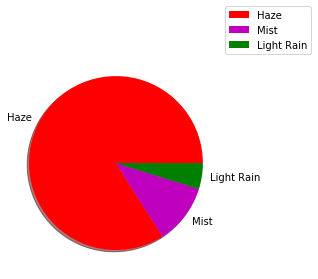

In [62]:
activities7 = ['Haze', 'Mist','Light Rain']
slices7 = [con_dict['07']['Haze'],con_dict['07']['Mist'],con_dict['07']['Light Rain']]
colors7 = ['r','m','g']
plt.pie(slices7, labels=activities7, colors=colors7, shadow=True)
plt.legend(loc=(1,1))
plt.show()

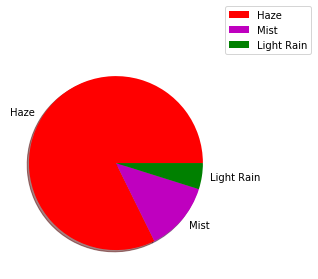

In [63]:
activities8 = ['Haze', 'Mist','Light Rain']
slices8 = [con_dict['08']['Haze'],con_dict['08']['Mist'],con_dict['08']['Light Rain']]
colors8 = ['r','m','g']
plt.pie(slices8, labels=activities8, colors=colors8, shadow=True)
plt.legend(loc=(1,1))
plt.show()

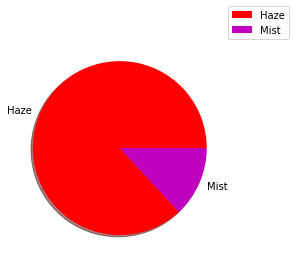

In [64]:
activities9 = ['Haze', 'Mist']
slices9 = [con_dict['09']['Haze'],con_dict['09']['Mist']]
colors9 = ['r','m']
plt.pie(slices9, labels=activities9, colors=colors9, shadow=True)
plt.legend(loc=(1,1))
plt.show()

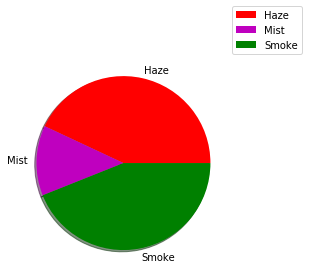

In [65]:
activities10 = ['Haze', 'Mist','Smoke']
slices10 = [con_dict['10']['Haze'],con_dict['10']['Mist'],con_dict['10']['Smoke']]
colors10 = ['r','m','g']
plt.pie(slices10, labels=activities10, colors=colors10, shadow=True)
plt.legend(loc=(1,1))
plt.show()

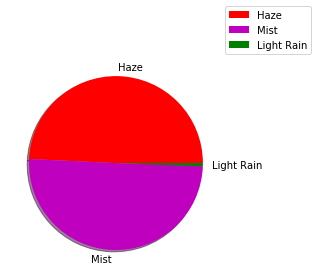

In [66]:
activities11 = ['Haze', 'Mist','Light Rain']
slices11 = [con_dict['11']['Haze'],con_dict['11']['Mist'],con_dict['11']['Light Rain']]
colors11 = ['r','m','g']
plt.pie(slices11, labels=activities11, colors=colors11, shadow=True)
plt.legend(loc=(1,1))
plt.show()

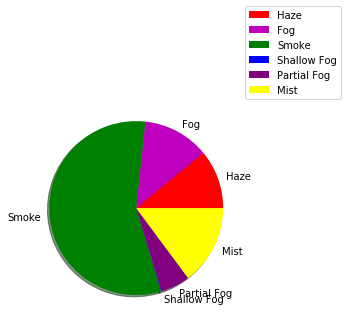

In [67]:
activities12 = ['Haze', 'Fog','Smoke', 'Shallow Fog', 'Partial Fog', 'Mist']
slices12 = [con_dict['12']['Haze'],con_dict['12']['Fog'],con_dict['12']['Smoke'],con_dict['05']['Shallow Fog'], con_dict['12']['Partial Fog'],con_dict['12']['Mist']]
colors12 = ['r','m','g', 'b', 'purple','yellow']
plt.pie(slices12, labels=activities12, colors=colors12, shadow=True)
plt.legend(loc=(1,1))
plt.show()